In [1]:
# Random Forest Classification
import pandas as pd 
import numpy as np 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("C:\\Users\\Asus\\Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [4]:
# Complete the Fraud dataset
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])

In [5]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


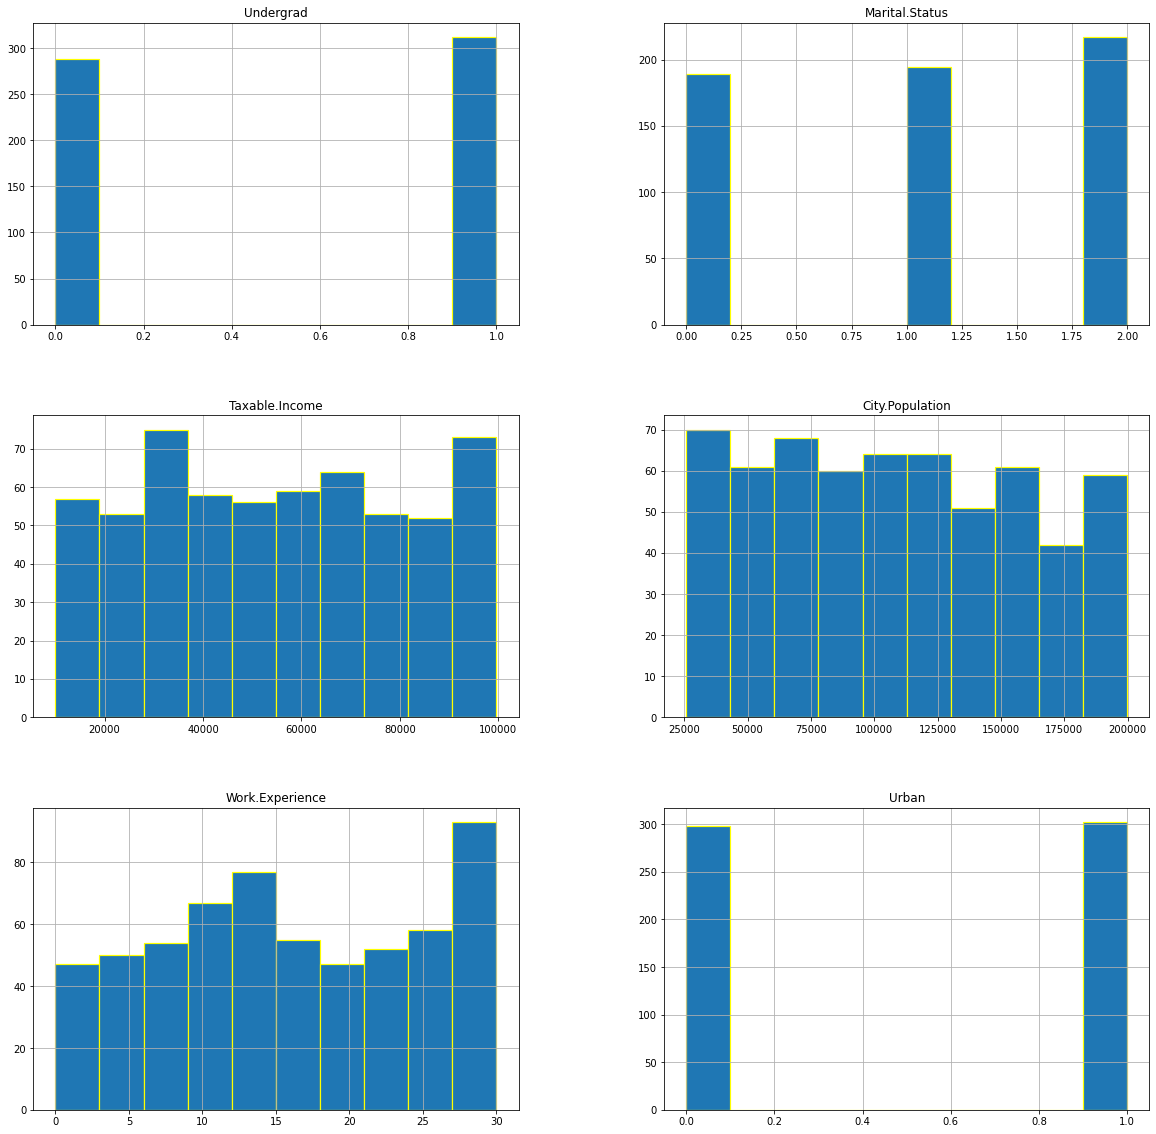

In [7]:
data.hist(edgecolor='yellow', linewidth=1.2, figsize=(20, 20));

In [8]:
#checking null values in dataset 
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
data.loc[data[data['Taxable.Income']<30000].index,'tax_status']='good'
data.loc[data[data['Taxable.Income']>=30000].index,'tax_status']='risky'

In [10]:
data.duplicated().sum()

0

In [11]:
x = data.drop(['tax_status'],axis=1)
y = data.tax_status

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40) 

### Building Random Forest classifier

In [14]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rf=rfc.fit(x_train, y_train)

In [15]:
## predicting on test data
y_pred = rf.predict(x_test)
y_pred

array(['risky', 'risky', 'risky', 'risky', 'good', 'good', 'risky',
       'good', 'good', 'risky', 'risky', 'good', 'good', 'risky', 'good',
       'good', 'risky', 'risky', 'risky', 'risky', 'risky', 'good',
       'risky', 'risky', 'risky', 'risky', 'risky', 'risky', 'risky',
       'risky', 'risky', 'risky', 'risky', 'risky', 'risky', 'risky',
       'risky', 'risky', 'risky', 'risky', 'risky', 'good', 'risky',
       'risky', 'risky', 'risky', 'risky', 'risky', 'good', 'risky',
       'risky', 'risky', 'risky', 'risky', 'risky', 'risky', 'risky',
       'risky', 'risky', 'risky', 'risky', 'risky', 'good', 'good',
       'risky', 'risky', 'risky', 'risky', 'risky', 'risky', 'risky',
       'good', 'risky', 'good', 'risky', 'risky', 'risky', 'risky',
       'good', 'risky', 'risky', 'risky', 'good', 'good', 'good', 'risky',
       'risky', 'risky', 'risky', 'good', 'good', 'risky', 'risky',
       'risky', 'good', 'good', 'risky', 'risky', 'risky', 'good',
       'risky', 'risky', '

In [16]:
Fraud = data[data['Taxable.Income'] == 'risky']
Valid = data[data['Taxable.Income'] == 'good']

In [17]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 1.0000


In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[ 40   0]
 [  0 140]]


### Bagging

In [21]:
from sklearn.ensemble import BaggingClassifier

In [22]:
bagging = BaggingClassifier(n_estimators=10)

In [23]:
bagging.fit(x_train,y_train)

BaggingClassifier()

In [24]:
pred = bagging.predict(x_test)

In [26]:
accuracy_score(y_test,pred)*100

100.0